<a href="https://colab.research.google.com/github/chitra-psg/lending-club/blob/master/customer_loan_profile_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
# Import the required modules
import pandas as pd
import seaborn as sns
import warnings


import matplotlib.pyplot as plt

In [79]:
# Configurations
pd.options.display.float_format = '{:.2f}'.format
sns.set_style('darkgrid')
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# The dataset has many columns and the list is getting truncated in the output. Hence, adjusting the configuration
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

In [80]:
# Load the source data from GitHub into dataframe for analysis
# Load all column data in and then determine data type : low_memory=False
df_loan = pd.read_csv("https://github.com/chitra-psg/lending-club/blob/master/data/loan.csv?raw=True", low_memory=False)
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# Data Cleansing

***Filtering rows required for the analysis***

In [81]:
# For the current exercise to identify attributes realted to Defaulters, we wont need Current loans so dropping
print("No. of rows before dropping Current loan = ", df_loan.shape[0])
# Loan status Current is still in progressed so will exclude
df_loan = df_loan[df_loan['loan_status'] != 'Current']
print("No. of rows after dropping Current loan = ", df_loan.shape[0])
# Copy row elimination from Mohan notebook here and check ##

No. of rows before dropping Current loan =  39717
No. of rows after dropping Current loan =  38577


***Filtering columns required for the analysis***

Data has too many columns. We will shortlist columns based on the data availability in the columns and then perform analysis of the data to shortlist attributes further for our analysis

In [82]:
# Case 1 : Analyse missing values in all columns

# Calcualte missing values percentage for all columns
missing_value = round((df_loan.isnull().sum()/len(df_loan.index)) * 100, 1)

print('No. of columns  = ', missing_value.count())
print('No. of columns with missing values = ', missing_value[missing_value > 0].count())
print('No. of columns with more than 50% missing values = ', missing_value[missing_value > 50].count())

# Drop columns with more than 50% data missing
df_loan.drop(missing_value[ missing_value > 50 ].index, axis=1, inplace=True)

print('No. of columns after drop = ', len(df_loan.columns))

## Take the logic from Mohan notebook

No. of columns  =  111
No. of columns with missing values =  66
No. of columns with more than 50% missing values =  57
No. of columns after drop =  54


In [83]:
# Case 2 : Check distinct values apart from Null in all columns

distinct_value = df_loan.nunique()
print('No. of columns  = ', distinct_value.count())
print('No. of columns with only one non NULL value = ', distinct_value[distinct_value ==1].count())

# Drop columns with just 1 non null value
df_loan.drop(distinct_value[ distinct_value == 1 ].index, axis=1, inplace=True)
print('No. of columns after drop = ', len(df_loan.columns))

No. of columns  =  54
No. of columns with only one non NULL value =  11
No. of columns after drop =  43


In [84]:
# Case 3 : Remove columns that are redundant or not useful for the use case we are analysing

# Customer  information that are understood to be not direclty related for the current analysis
# id , member_id, desc , url, zip_code ,title 

# Loan details that are understood to be not direclty related for the current analysis
# delinq_2yrs, earliest_cr_line, loan_amnt,inq_last_6mths, open_acc,pub_rec,revol_bal,total_acc,out_prncp, funded_amnt
# out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries
# collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d

ls_columns_to_be_dropped = ['id','member_id', 'desc', 'url', 'zip_code', 'title', 'delinq_2yrs', 'earliest_cr_line', 'loan_amnt',
                            'inq_last_6mths', 'open_acc','pub_rec','revol_bal','total_acc', 'funded_amnt','total_pymnt','total_pymnt_inv',
                            'total_rec_prncp','total_rec_int','total_rec_late_fee', 'recoveries','collection_recovery_fee','last_pymnt_d',
                            'last_pymnt_amnt','last_credit_pull_d']

df_loan.drop(ls_columns_to_be_dropped, axis=1, inplace=True)

***Standardising Values***

In [85]:
# issue_d data is available in MMM-YY format. Extract year and Month as separate columns
df_loan['issue_month'] = pd.to_datetime(df_loan['issue_d'], format='%b-%y').dt.month.astype(int)
df_loan['issue_year'] = pd.to_datetime(df_loan['issue_d'], format='%b-%y').dt.year.astype(int)

#Standardizing values in the below columns by extracting only  numeric characters

# It has % in the interest rate. % symbol will be removed
df_loan['int_rate'] = df_loan['int_rate'].str.extract('(\d+)', expand=False).astype(float)
df_loan['revol_util'] = df_loan['revol_util'].str.extract('(\d+)', expand=False).astype(float)

#Term has values like 36 months and 60 months. This will give 36 and 60 as output
df_loan['term'] = df_loan['term'].str.extract('(\d+)', expand=False).astype(int)

# Emp length has <1 year, 10+ years, 3 years type of values. We will treat <1 as 1 and 10+ as 10 for the analysis
df_loan['emp_length'] = df_loan['emp_length'].fillna('0').str.extract('(\d+)', expand=False).astype(int)

In [86]:
df_loan.head()

,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,revol_util,pub_rec_bankruptcies,issue_month,issue_year
0,4975.00,36,10.00,162.87,B,B2,NaN,10,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,83.00,0.00,12,2011
1,2500.00,60,15.00,59.83,C,C4,Ryder,1,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,GA,1.00,9.00,0.00,12,2011
2,2400.00,36,15.00,84.33,C,C5,NaN,10,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,98.00,0.00,12,2011
3,10000.00,36,13.00,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,CA,20.00,21.00,0.00,12,2011
5,5000.00,36,7.00,156.46,A,A4,Veolia Transportaton,3,RENT,36000.00,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,28.00,0.00,12,2011


**Identifying Outliers**



In [87]:
df_loan.describe()
# Observation 
# Observed few outlier customers who fall under high annual income.

,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,revol_util,pub_rec_bankruptcies,issue_month,issue_year
count,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38527.00,37880.00,38577.00,38577.00
mean,10222.48,41.90,11.36,322.47,4.93,68777.97,13.27,48.26,0.04,7.11,2010.31
std,7022.72,10.33,3.73,208.64,3.45,64218.68,6.67,28.34,0.20,3.41,0.88
min,0.00,36.00,5.00,15.69,0.00,4000.00,0.00,0.00,0.00,1.00,2007.00
25%,5000.00,36.00,8.00,165.74,2.00,40000.00,8.13,25.00,0.00,4.00,2010.00
50%,8733.44,36.00,11.00,277.86,4.00,58868.00,13.37,49.00,0.00,7.00,2011.00
75%,14000.00,36.00,14.00,425.55,9.00,82000.00,18.56,72.00,0.00,10.00,2011.00
max,35000.00,60.00,24.00,1305.19,10.00,6000000.00,29.99,99.00,2.00,12.00,2011.00


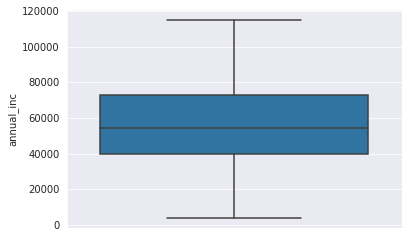

In [88]:
# Identify applicants with more than 90% salary and remove them for the current analysis
p_90  = df_loan.annual_inc.quantile(0.90)
df_normalised_loan = df_loan[~(df_loan['annual_inc'] >= p_90 ) ]

#check % of people getting dropped and add note below
sns.boxplot( y="annual_inc",
            data=df_normalised_loan)

In [89]:
# create bins for int_rate range
rate_bins = [0, 7.5, 10, 12.5, 15, 100]
rate_bucket = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15+']
df_normalised_loan['int_rate_range'] = pd.cut(df_normalised_loan['int_rate'].astype(int), rate_bins, labels=rate_bucket)
df_normalised_loan['int_rate_range'].value_counts()

12.5-15    8178
7.5-10     7515
0-7.5      7287
10-12.5    6915
15+        4682
Name: int_rate_range, dtype: int64

In [90]:
# create bins for dti range
dti_bin = [-1, 5.00, 10.00, 15.00, 20.00, 25.00, 50.00]
dti_bucket = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25%+']
df_normalised_loan['dti_range'] = pd.cut(df_normalised_loan['dti'], dti_bin, labels=dti_bucket)
df_normalised_loan['dti_range'].value_counts()

10-15%    8611
15-20%    8125
5-10%     6701
20-25%    6238
0-5%      4296
25%+       606
Name: dti_range, dtype: int64

In [91]:
# Identify region based on the state code given in the map https://www.mappr.co/political-maps/us-regions-map/
west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
northeast = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']
southwest = ['AZ', 'TX', 'NM', 'OK']
southeast = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
midwest = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']

def map_regions(state):
    if state in west:
        return 'West'
    elif state in southwest:
        return 'SouthWest'
    elif state in southeast:
        return 'SouthEast'
    elif state in midwest:
        return 'MidWest'
    elif state in northeast:
        return 'NorthEast'
        
df_normalised_loan['region'] = df_normalised_loan['addr_state'].apply(map_regions)

In [92]:
print('Attibutes for analysis are -', df_normalised_loan.columns)

Attibutes for analysis are - Index(['funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'revol_util', 'pub_rec_bankruptcies',
       'issue_month', 'issue_year', 'int_rate_range', 'dti_range', 'region'],
      dtype='object')


# **Univariate Analysis**

In [93]:
def PlotAttribute(df_data, attribute, hueattribute, title, xlabel, ylabel):  
  if(hueattribute == "none"):
    chrt = sns.countplot(x=attribute,data=df_data)
  else:
    chrt = sns.countplot(x=attribute,hue=hueattribute, data=df_data)
  chrt.set_title(title,fontsize=14)
  chrt.set_xlabel(xlabel,fontsize=14)
  chrt.set_ylabel(ylabel,fontsize=14) 

  # To show count of values above bars
  for patch in chrt.patches:
      x, y = patch.get_xy()   # Bottom-left corner. 
      x += patch.get_width()/2 # Middle of the width.
      y += patch.get_height()  # Top of the bar
      color = patch.get_facecolor()
      chrt.text(x, y, str(y))
  return chrt

*** Unordered Categorical Variables ***<br>


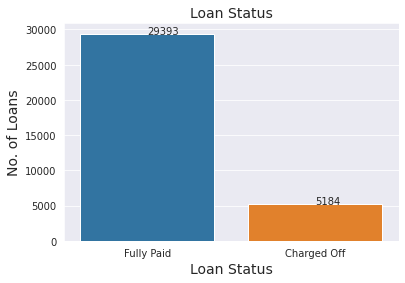

In [94]:
#Analysis on Loan Status

plt.figure(figsize= (6,4))
PlotAttribute(df_normalised_loan, 'loan_status', 'none', 'Loan Status', 'Loan Status', 'No. of Loans')
plt.show()

# Observation
# 14.9 % loans were charged off

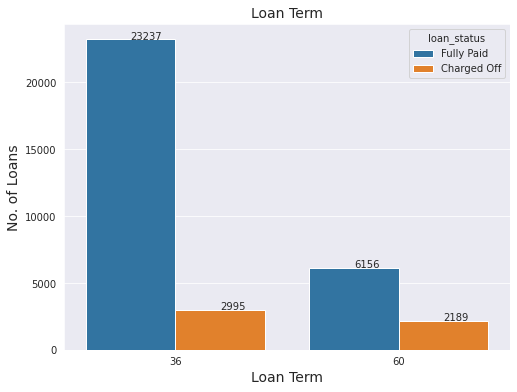

In [95]:
#Analysis on Loan Term
plt.figure(figsize= (8,6))
PlotAttribute(df_normalised_loan, 'term', 'loan_status', 'Loan Term', 'Loan Term', 'No. of Loans')
plt.show()

# Observation
# Significant no. of loans were issued with 36 months term
# Ratio of default is higher in 60 months term

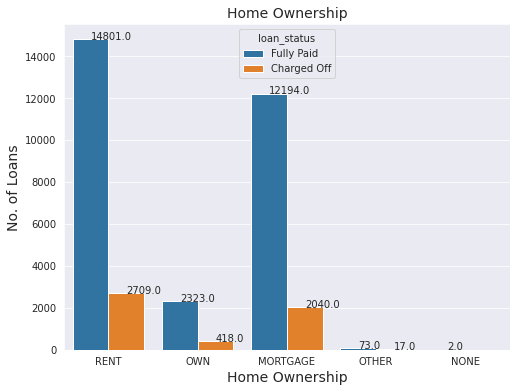

In [96]:
# Univariate Analysis on home ownership by Status

plt.figure(figsize= (8,6))
PlotAttribute(df_normalised_loan, 'home_ownership', 'loan_status', 'Home Ownership', 'Home Ownership', 'No. of Loans')
plt.show()

# Observation
# Applicants who fall under MORTGAGE and RENT have higher charged off  loans comapred to OWN

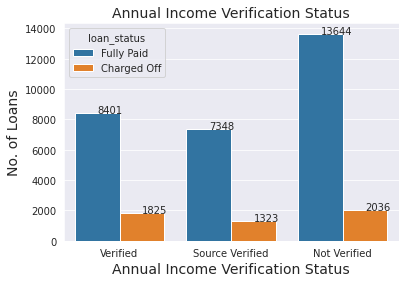

In [97]:
#Analysis on Annual Income Verification Status
PlotAttribute(df_normalised_loan, 'verification_status','loan_status', 'Annual Income Verification Status', 'Annual Income Verification Status', 'No. of Loans')
plt.show()

# Observation
# It doesnt look like Unverified has significantly higher defaulers comapred the verified ones.

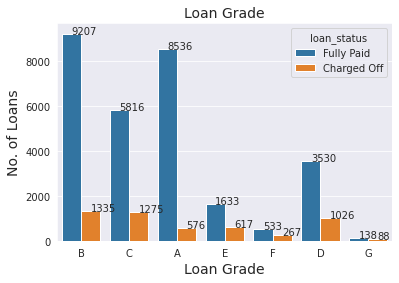

In [98]:
# Univariate Analysis on grade by Status
PlotAttribute(df_normalised_loan, 'grade','loan_status', 'Loan Grade', 'Loan Grade', 'No. of Loans')
plt.show()
# Observation
# Loans falling under Grade B, C and D have higher charged off

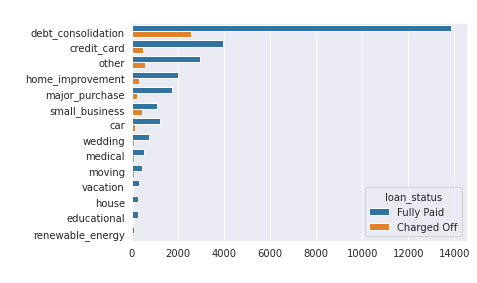

In [99]:
# Univariate Analysis on Loan Purpose by Status
chrt = sns.countplot(y="purpose", data=df_normalised_loan, hue='loan_status' , order = df_normalised_loan['purpose'].value_counts().index)
chrt.set_title('Purpose Of Loan',fontsize=14,color='w')
chrt.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
chrt.set_xlabel('No. of Loans',fontsize=14,color = 'w')      
plt.show()

# Obervation
# Debt Consolidation, Credit Card and Other are the top 3 purpose behind the loans that were charged off.

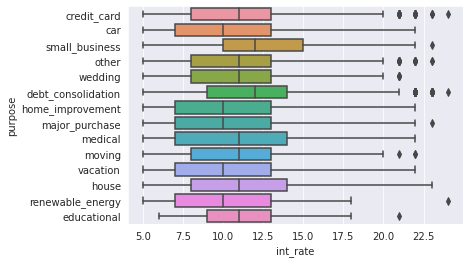

In [100]:
# Bivariate Aanlysis - Interest Rate and Purpose
sns.boxplot(data=df_normalised_loan,x="int_rate",y="purpose")
plt.show()
#Summary
#1. There is higher interest rate for the small business

Ordered Categorical Variables

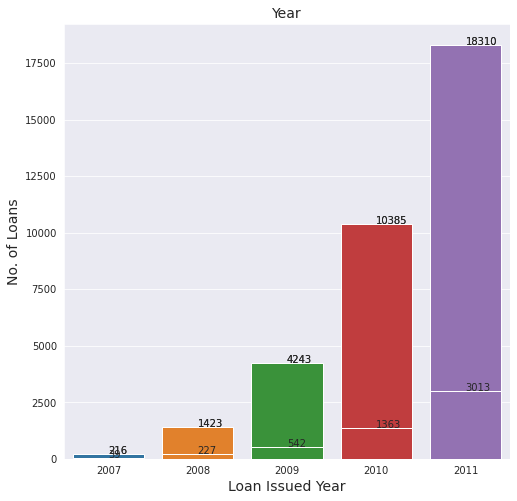

In [101]:
#Analysis on Loan Month

plt.figure(figsize= (8,8))
PlotAttribute(df_normalised_loan, 'issue_year','none', 'Year', 'Loan Issued Year', 'No. of Loans')
PlotAttribute(df_normalised_loan.loc[(df_normalised_loan['loan_status'] =="Charged Off")], 'issue_year','none', 'Year', 'Loan Issued Year', 'No. of Loans')
plt.show()


# Observation
# There is a significant increase in the no. of loans issued over the year and the defaulters too.

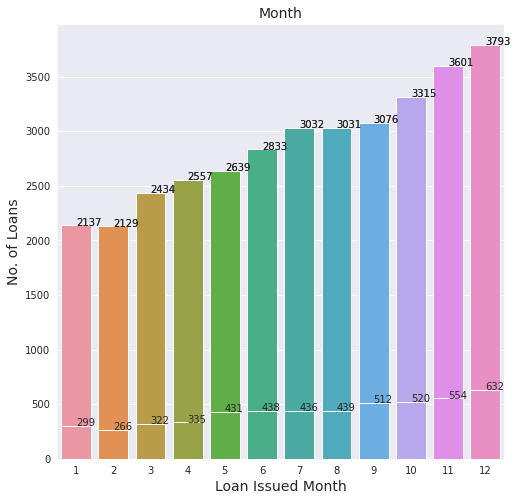

In [102]:
#Analysis on Loan Month

plt.figure(figsize= (8,8))
PlotAttribute(df_normalised_loan, 'issue_month','none', 'Year', 'Loan Issued Year', 'No. of Loans')
PlotAttribute(df_normalised_loan.loc[(df_normalised_loan['loan_status'] =="Charged Off")], 'issue_month','none', 'Month', 'Loan Issued Month', 'No. of Loans')
plt.show()

# Observation
# There is a  increase in the no. of loans issued towards end of the year

<Figure size 864x576 with 0 Axes>

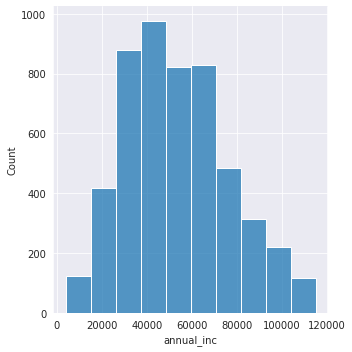

In [103]:
# Univariate Analysis on Annual Income 
plt.figure(figsize= (12,8))
sns.displot(df_normalised_loan.loc[(df_normalised_loan['loan_status'] =="Charged Off")]['annual_inc'], bins=10)
plt.show()

# Observation
# People with Annual Income around 40000 have higher number of loans defaulted

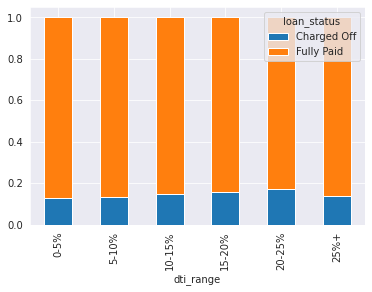

In [104]:
# create stacked bar chart for Debt To Income Range
df_normalised_loan.groupby('dti_range')['loan_status'].value_counts(normalize=True).unstack('loan_status').plot.bar(stacked=True)
plt.show()

# Observation
# Defaulters are within 20% across all DTI Range

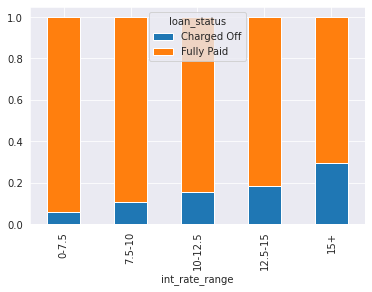

In [105]:
# create stacked bar chart for Debt To Income Range
df_normalised_loan.groupby('int_rate_range')['loan_status'].value_counts(normalize=True).unstack('loan_status').plot.bar(stacked=True)
plt.show()

# Observation
# Defaulters increase as the Interest Rate increases

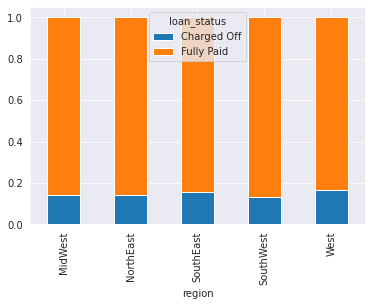

In [106]:
# create stacked bar chart for Region
df_normalised_loan.groupby('region')['loan_status'].value_counts(normalize=True).unstack('loan_status').plot.bar(stacked=True)
plt.show()

# Observation
# Charged Off percentage is within 20 % across all regions

In [107]:
def GetChargedOffPercentage(df_dataset, attribute_list):
  lst_attribute_list = list(attribute_list.split(","))
  print(lst_attribute_list)
  df_attribute_status = df_dataset.groupby(lst_attribute_list).loan_status.count().unstack().fillna(0).reset_index()
  df_attribute_status['Total'] = df_attribute_status['Charged Off'] + df_attribute_status['Fully Paid'] 
  df_attribute_status['Chargedoff%'] = (df_attribute_status['Charged Off'] / df_attribute_status['Total']) * 100
  return df_attribute_status

In [108]:
# Find the Charged Off Loan % for various loan Grades
df_grade_status = GetChargedOffPercentage(df_normalised_loan, 'grade,loan_status')
df_grade_status.sort_values('Chargedoff%', ascending=False)

# Observation
# Grade G tops the Charged OFf percentage

['grade', 'loan_status']


loan_status,grade,Charged Off,Fully Paid,Total,Chargedoff%
6,G,88,138,226,38.94
5,F,267,533,800,33.38
4,E,617,1633,2250,27.42
3,D,1026,3530,4556,22.52
2,C,1275,5816,7091,17.98
1,B,1335,9207,10542,12.66
0,A,576,8536,9112,6.32


In [109]:
# Find the Charged Off Loan % for various loan purposes
df_grade_status = GetChargedOffPercentage(df_normalised_loan, 'purpose,loan_status')
df_grade_status.sort_values('Chargedoff%', ascending=False)

# Observation
# Small business has higher number of Charged Off loans and earlier we noticed this has higher interest rates as well.

['purpose', 'loan_status']


loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff%
11,small_business,435,1070,1505,28.90
10,renewable_energy,18,70,88,20.45
3,educational,53,252,305,17.38
8,moving,89,425,514,17.32
9,other,578,2959,3537,16.34
7,medical,99,508,607,16.31
5,house,50,268,318,15.72
2,debt_consolidation,2567,13852,16419,15.63
12,vacation,51,301,352,14.49
4,home_improvement,300,1998,2298,13.05


***Multivariate Analysis***

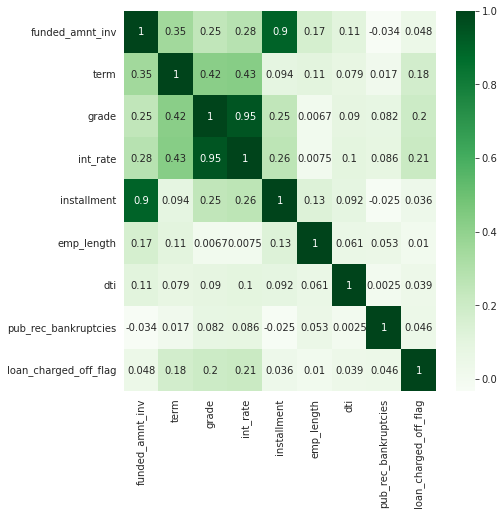

In [114]:
# Convert Grade and Loan Status to numeric to be able to include in the correlation analysis
grade_dict = {"A" : 1, "B" : 2, "C": 3, "D" : 4, "E": 5, "F" : 6, "G": 7}
df_normalised_loan.replace({"grade": grade_dict},inplace=True)
df_normalised_loan['loan_charged_off_flag'] = df_normalised_loan.loan_status.apply(lambda status: 1 if status=="Charged Off" else 0 )

plt.figure(figsize= (7,7))
df_normalised_loan_subset = df_normalised_loan[["funded_amnt_inv","term","grade","int_rate","installment","emp_length","dti","pub_rec_bankruptcies","loan_charged_off_flag"]]
sns.heatmap(df_normalised_loan_subset.corr(), cmap="Greens",annot=True)
plt.show()

# Observation
# loan_charge off have slightly posistive correlation with term & interest_rate 
# term have positive correlation with funded amount & interest rate
# Grade has positive correlation with Interest Rate, Term and Loan Status

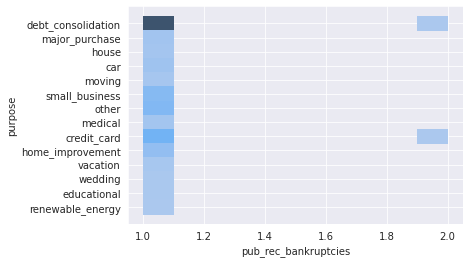

In [79]:
# Plot Loan purpose and Bankruptcies to identify relationship
sns.histplot(data=df_normalised_loan[(df_normalised_loan.pub_rec_bankruptcies > 0) & (df_normalised_loan.loan_status == "Charged Off")],
             y="purpose",x="pub_rec_bankruptcies")
plt.show()
#Summary
# People with bankrupcies majorly took loan for debt_consolidation & credit card